# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [2]:
path = '../data/processed/bias_detection/revised_bias_detection_tools_thinking.json'

In [3]:
data = pd.read_json(path)
data.head()

,paper_id,paper_title,paper_abstract,review_ids,review_writers,review_contents,sentiment,sentiment_reason,tone,tone_reason,consistency,consistency_reason,pairwise_comparison,bias_detection_chain_output
0,iclr_2021_IFqrg1p5Bc,Distance-Based Regularisation of Deep Networks...,We investigate approaches to regularisation du...,"[GUlmylQMl3, pc1JzK8Hlux, TdQmSVH7w_w, LKQ3ydP...","[official_reviewer, official_reviewer, officia...",[This paper proposes new regularization method...,"[Negative, Positive, Positive, Positive, Negat...",[The review expresses significant concerns abo...,"[Critical, Neutral, Balanced, Supportive, Crit...","[The review uses phrases like 'misleading,' 'i...","[Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, ...","[The review is consistent in its critique, foc...","[{'review_id': 'GUlmylQMl3', 'comparison': {'i...","[{'review_id': 'GUlmylQMl3', 'review': 'This p..."
1,nips_2021_khZGbgRQjjM,Stylized Dialogue Generation with Multi-Pass D...,"Stylized dialogue generation, which aims to ge...","[O8vM_cMz9y-, T2ikjIJ68m8, TPQmV9oN9dh, QaXWYZ...","[official_reviewer, official_reviewer, officia...",[ Thanks a lot for addressing my concerns.\nTh...,"[Positive, Neutral, Positive, Positive, Neutra...",[The reviewer expresses gratitude ('Thanks a l...,"[Supportive, Balanced, Supportive, Balanced, N...",[The reviewer uses phrases like 'Thanks a lot'...,"[Yes, Yes, Yes, Yes, Yes, Yes, Yes]",[The review expresses positive feedback regard...,"[{'review_id': 'O8vM_cMz9y-', 'comparison': {'...","[{'review_id': 'O8vM_cMz9y-', 'review': ' Than..."
2,nips_2022_kK200QKfvjB,Feature Learning in $L_2$-regularized DNNs: At...,We study the loss surface of DNNs with $L_{2}$...,"[s4bgf5KBgI2, AcUsOCVG5bu, WYWk9_4Lhe8, WtkW3F...","[official_reviewer, official_reviewer, officia...","[ Dear authors,\n\nThanks for the extensive cl...","[Positive, Positive, Neutral, Neutral, Positiv...",[The reviewer expresses satisfaction with the ...,"[Balanced, Supportive, Critical, Balanced, Bal...","[The tone is balanced, acknowledging the paper...","[Yes, Yes, Yes, Yes, Yes, Yes]",[The review is consistent as the reviewer expr...,"[{'review_id': 's4bgf5KBgI2', 'comparison': {'...","[{'review_id': 's4bgf5KBgI2', 'review': ' Dear..."
3,iclr_2020_BkgNqkHFPr,Enhanced Convolutional Neural Tangent Kernels,Recent research shows that for training with l...,"[Byxqt4VztH, ryltv8TTFB, H1eOHZN2or, S1gzyEd6FH]","[official_reviewer, official_reviewer, officia...",[This paper shows that there is a one-to-one c...,"[Negative, Negative, Positive, Neutral]",[The reviewer expresses significant concerns a...,"[Critical, Critical, Supportive, Critical]","[The review uses direct and critical language,...","[Yes, Yes, Yes, Yes]",[The review is consistent because the reviewer...,"[{'review_id': 'Byxqt4VztH', 'comparison': {'i...","[{'review_id': 'Byxqt4VztH', 'review': 'This p..."
4,iclr_2019_B1lfHhR9tm,The Natural Language Decathlon: Multitask Lear...,Deep learning has improved performance on many...,"[rJliXSXJ1E, Syx1siQK37, H1eWSvGJk4, BklnA4fky...","[official_reviewer, official_reviewer, officia...",[Thank you for replying. I understand the poi...,"[Positive, Positive, Positive, Positive, Posit...",[The reviewer expresses gratitude and acknowle...,"[Supportive, Balanced, Supportive, Balanced, S...",[The reviewer is supportive by acknowledging t...,"[Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, ...",[The reviewer explicitly states they updated t...,"[{'review_id': 'rJliXSXJ1E', 'comparison': {'i...","[{'review_id': 'rJliXSXJ1E', 'review': 'Thank ..."


In [4]:
review_id = []
review = []
bias_detected_bool = []
bias_type = []
confidence_score = []
evidence = []
suggestions = []

for output in tqdm(data['bias_detection_chain_output']):
    for list_data in output:
        # print(list_data['review_id'])    # type: debug
        review_id.append(list_data['review_id'])
        review.append(list_data['review'])
        bias_detected_bool.append(list_data['bias_detection_output']['bias_detected'])
        bias_type.append(list_data['bias_detection_output']['bias_type'])
        confidence_score.append(list_data['bias_detection_output']['confindence_score'])
        evidence.append(list_data['bias_detection_output']['evidence'])
        suggestions.append(list_data['bias_detection_output']['suggestion_for_improvements'])

df = pd.DataFrame({'review_id': review_id, 'review': review, 'bias_detected_bool': bias_detected_bool,
                   'bias_type': bias_type, 'confidence_score': confidence_score, 'evidence': evidence,
                   'suggestions': suggestions})

df.head()

100%|██████████| 200/200 [00:00<00:00, 58551.04it/s]


,review_id,review,bias_detected_bool,bias_type,confidence_score,evidence,suggestions
0,GUlmylQMl3,This paper proposes new regularization methods...,False,[None],10.0,[None],[None]
1,pc1JzK8Hlux,The reviewer thanks the authors for the respon...,False,[None],10.0,[None],[None]
2,TdQmSVH7w_w,This paper studies regularization for neural n...,False,[None],9.0,[None],[None]
3,LKQ3ydPIzdw,Thank you for the update! I have updated my re...,False,[None],9.0,[None],[None]
4,f2loxf--1wI,Thanks for all the clarifications. \n\nTo clar...,True,"[Novelty Bias, Confirmation Bias]",8.0,[Reproducing past results on benchmarks that a...,[The reviewer should focus on the methodology ...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_id           1043 non-null   object 
 1   review              1043 non-null   object 
 2   bias_detected_bool  1043 non-null   object 
 3   bias_type           1043 non-null   object 
 4   confidence_score    1043 non-null   float64
 5   evidence            1043 non-null   object 
 6   suggestions         1043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 57.2+ KB


In [6]:
df.isna().sum()

review_id             0
review                0
bias_detected_bool    0
bias_type             0
confidence_score      0
evidence              0
suggestions           0
dtype: int64

In [7]:
for column in df.columns:
    if type(df[column][0])==list:
        print(f'List column, {len(df)} unique values!\n')
        continue
    print(f"{column} column: {df[column].nunique()} unique values!\n")

review_id column: 1043 unique values!

review column: 1042 unique values!

bias_detected_bool column: 2 unique values!

List column, 1043 unique values!

confidence_score column: 21 unique values!

List column, 1043 unique values!

List column, 1043 unique values!



# EDA

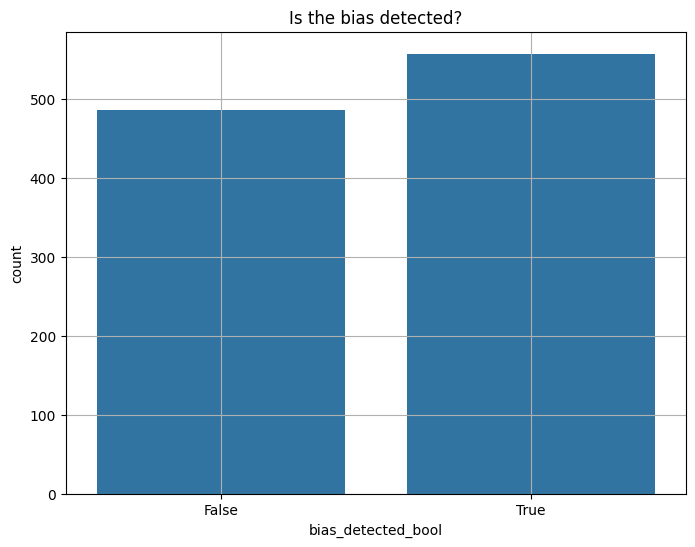

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='bias_detected_bool', )
plt.title("Is the bias detected?")
plt.grid()
plt.show()

In [10]:
# Nearly equal reviews where the bias is detected or not by agents

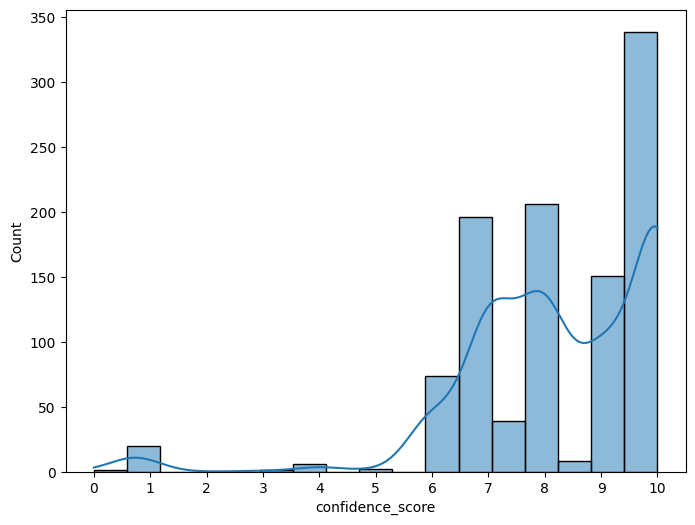

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='confidence_score', kde=True)
plt.xticks(np.arange(0, 11, 1))
plt.show()

In [12]:
# The confidence score is always in the higher range by LLM agents (7-10)
# Confidence score is how confident is LLM overall for putting those reviews in those bias class

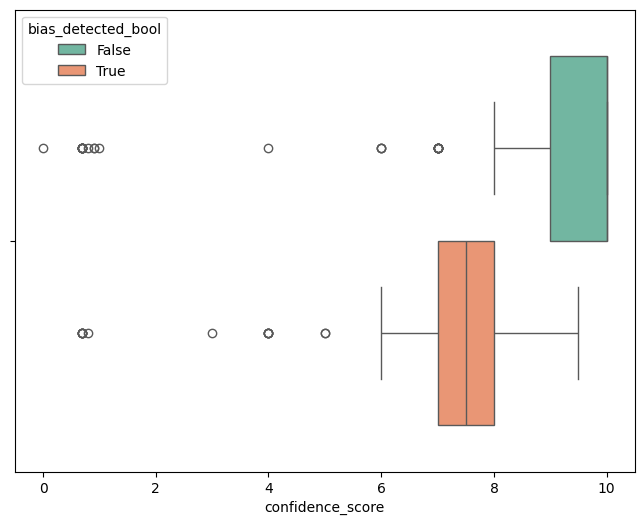

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(hue='bias_detected_bool', x='confidence_score', data=df, palette='Set2')
plt.show()

In [14]:
# Agents and LLM is more confident to label False class of bias detection i.e. LLM tells that this review contains no bias more confidently
# Still, the range of confidence for True bias detection bool is high
# Outliers always exist 

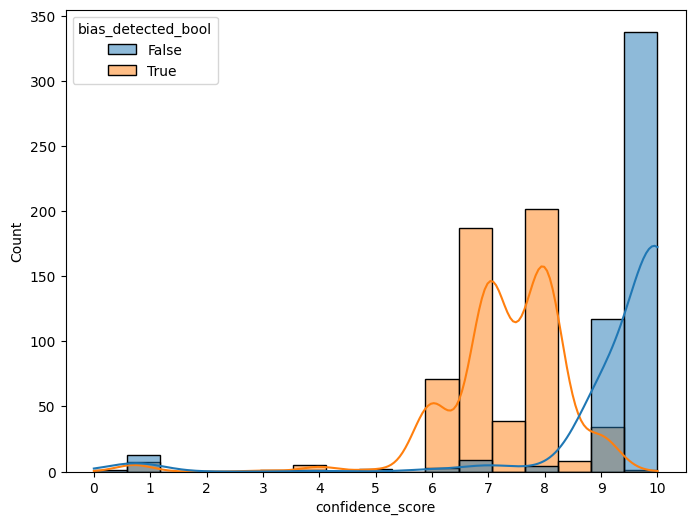

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='confidence_score', hue='bias_detected_bool', kde=True)
plt.xticks(np.arange(0, 11, 1))
plt.show()

In [17]:
# 9-10 is most common range of confidence score to label False as bias detected
# 7-8 is most common range for True label as bias detected

In [18]:
df.head()

,review_id,review,bias_detected_bool,bias_type,confidence_score,evidence,suggestions
0,GUlmylQMl3,This paper proposes new regularization methods...,False,[None],10.0,[None],[None]
1,pc1JzK8Hlux,The reviewer thanks the authors for the respon...,False,[None],10.0,[None],[None]
2,TdQmSVH7w_w,This paper studies regularization for neural n...,False,[None],9.0,[None],[None]
3,LKQ3ydPIzdw,Thank you for the update! I have updated my re...,False,[None],9.0,[None],[None]
4,f2loxf--1wI,Thanks for all the clarifications. \n\nTo clar...,True,"[Novelty Bias, Confirmation Bias]",8.0,[Reproducing past results on benchmarks that a...,[The reviewer should focus on the methodology ...


In [19]:
novelty = confirm = lingus = pos = method = none = 0
for biases in tqdm(df['bias_type']):
    for bias in biases:
        if bias=='Novelty Bias':
            novelty+=1
        elif bias=='Confirmation Bias':
            confirm+=1
        elif bias=='Linguistic Bias':
            lingus+=1
        elif bias=='Positive Results Bias':
            pos+=1
        elif bias=='Methodology Bias':
            method+=1
        elif bias=='None':
            none+=1
        else:
            print(bias)

100%|██████████| 1043/1043 [00:00<00:00, 345358.73it/s]

leniency_bias
Administrative aspect bias


C:\Users\Arya  Gokhale\AppData\Local\Temp\ipykernel_3452\3914087651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bias_data.sort_values(by='Count', ascending=False), y='Bias Type', x='Count', palette='crest')


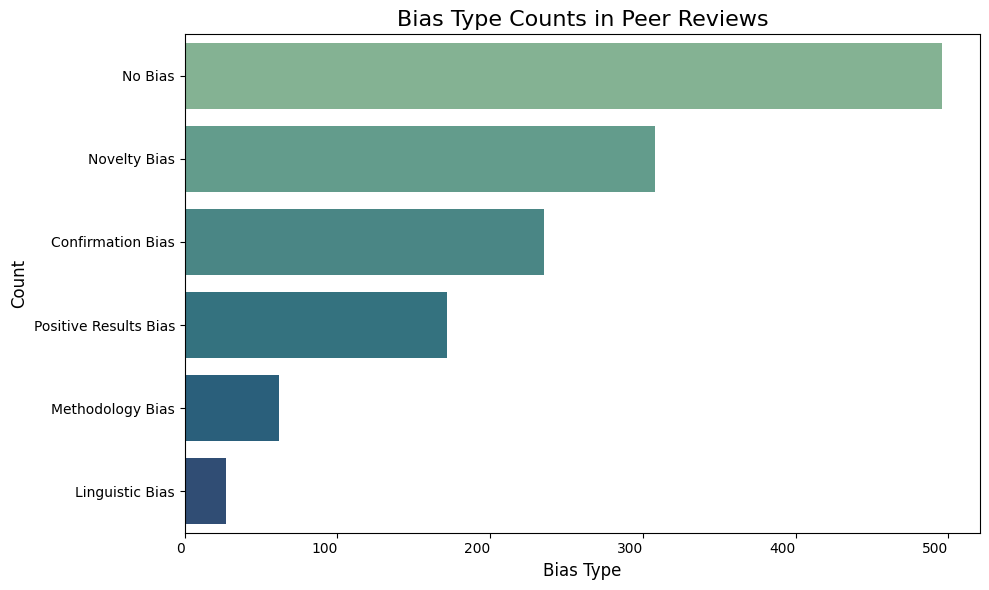

In [20]:
bias_data = pd.DataFrame({
    'Bias Type': ['Novelty Bias', 'Confirmation Bias', 'Linguistic Bias', 'Positive Results Bias', 'Methodology Bias', 'No Bias'],
    'Count': [novelty, confirm, lingus, pos, method, none]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=bias_data.sort_values(by='Count', ascending=False), y='Bias Type', x='Count', palette='crest')

plt.title('Bias Type Counts in Peer Reviews', fontsize=16)
plt.xlabel('Bias Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

C:\Users\Arya  Gokhale\AppData\Local\Temp\ipykernel_3452\2452528584.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bias_data.sort_values(by='Count', ascending=False), x='Bias Type', y='Count', palette='crest')


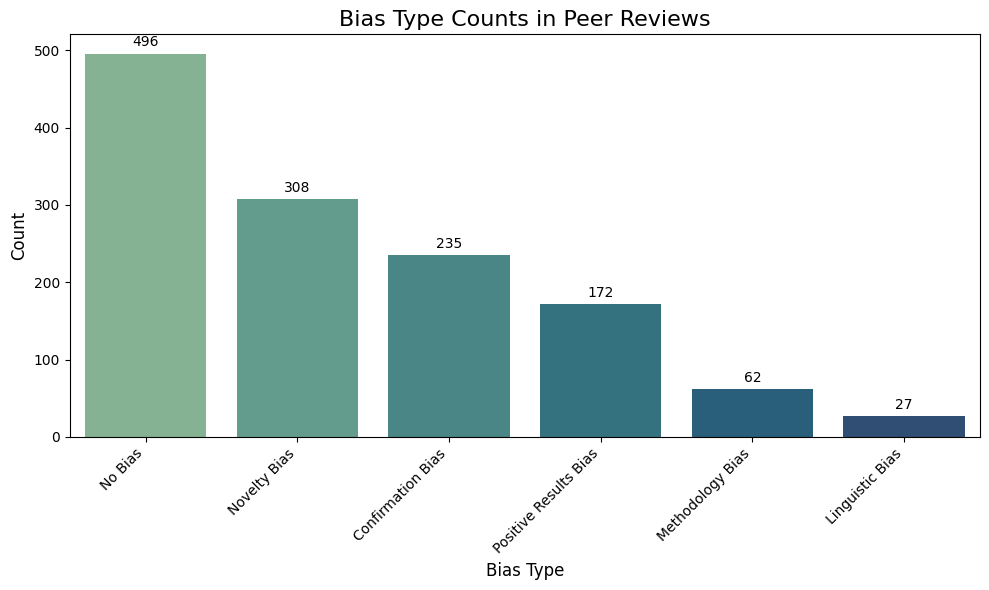

In [21]:
bias_data = pd.DataFrame({
    'Bias Type': ['Novelty Bias', 'Confirmation Bias', 'Linguistic Bias', 'Positive Results Bias', 'Methodology Bias', 'No Bias'],
    'Count': [novelty, confirm, lingus, pos, method, none]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=bias_data.sort_values(by='Count', ascending=False), x='Bias Type', y='Count', palette='crest')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.title('Bias Type Counts in Peer Reviews', fontsize=16)
plt.xlabel('Bias Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# High No bias classes.
# There are still large number of bias detected in front of no bias when aggregated
# Novelty and Confirmation Bias occurr most of the time
# Positive Results bias are in moderation
# Very few methodology and linguistic bias